In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
%matplotlib inline

I'm using Bank Loan dataset ([Link](https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling)) from Kaggle. I chose it because it's interesting marketing case and it has a few quantitative variables



In [4]:
main = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv', sep = ';', parse_dates=True, index_col=0)
main.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,"1,60",1,0,0,1,0,0,0
2,45,19,34,90089,3,"1,50",1,0,0,1,0,0,0
3,39,15,11,94720,1,"1,00",1,0,0,0,0,0,0
4,35,9,100,94112,1,"2,70",2,0,0,0,0,0,0
5,35,8,45,91330,4,"1,00",2,0,0,0,0,0,1


In [ ]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 5000 non-null   int64 
 1   Experience          5000 non-null   int64 
 2   Income              5000 non-null   int64 
 3   ZIP Code            5000 non-null   int64 
 4   Family              5000 non-null   int64 
 5   CCAvg               5000 non-null   object
 6   Education           5000 non-null   int64 
 7   Mortgage            5000 non-null   int64 
 8   Personal Loan       5000 non-null   int64 
 9   Securities Account  5000 non-null   int64 
 10  CD Account          5000 non-null   int64 
 11  Online              5000 non-null   int64 
 12  CreditCard          5000 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 546.9+ KB


we can already see that data don't have any NAs, but there is problem with CCAvg variable. It was recognized as a object type instead of integer

In [ ]:
main.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.0604,0.238250,0.0,0.0,0.0,0.0,1.0


Experience variable somehow has negative values - need cleaning

In [5]:
df = main[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'Personal Loan']]

In [ ]:
df.isnull().sum()

Age              0
Experience       0
Income           0
CCAvg            0
Mortgage         0
Personal Loan    0
dtype: int64

In [ ]:
# check unique values for each column
df.nunique()

Age               45
Experience        47
Income           162
CCAvg            108
Mortgage         347
Personal Loan      2
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.7742,46.033729,8.0,39.0,64.0,98.0,224.0
Mortgage,5000.0,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0


next we will look at distribution of numerical variables (i stole this part of code from kaggle notebook)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

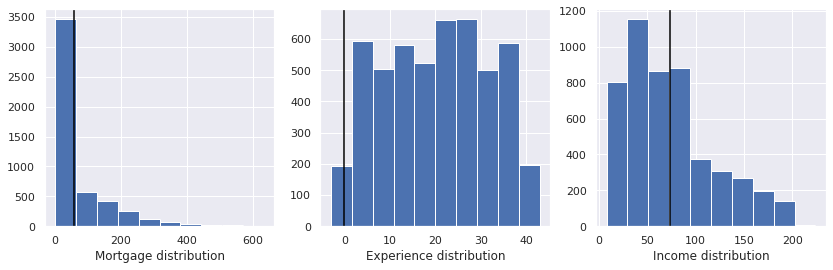

In [ ]:
#cols = ['Experience', 'Mortgage', 'Income']
fig, [ax0, ax1, ax2] = plt.subplots(1,3, figsize = (14,4))

ax0.hist(df.Mortgage)
ax0.set_xlabel('Mortgage distribution')
ax0.axvline(df.Mortgage.mean(), color = "black")

ax1.hist(df.Experience)
ax1.set_xlabel('Experience distribution')
ax1.axvline(0, color = "black");

ax2.hist(df.Income)
ax2.set_xlabel('Income distribution')
ax2.axvline(df.Income.mean(), color = "black");

## Cleaning

1. Change 'CCAvg' column to float

In [6]:
# replace ',' with '.' in CCAvg
df['CCAvg'] = df['CCAvg'].apply(lambda x: x.replace(',', '.'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
# change Total_income type to float
df['CCAvg'] = df['CCAvg'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


2. Clean 'Experience' with negative values 

Either delete rows with negative values or impute data

In [ ]:
# number of obs with neg experience
len(df[df['Experience'] < 0])

52

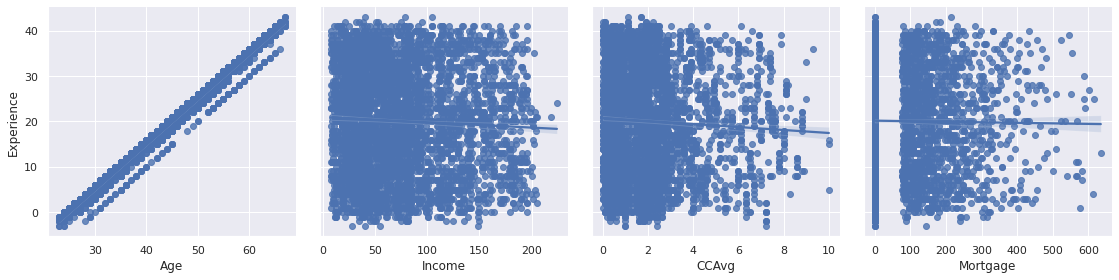

In [ ]:
# check which variables correlate with experience
ncol = ['Age', 'Income','CCAvg', 'Mortgage']
grid = sns.PairGrid(df, y_vars = 'Experience', x_vars = ncol, height = 4)
grid.map(sns.regplot);

'Experience' has a strong correlation with age, so we can use it to impute values in 'experince'

In [8]:
# get list of unique age values with negative experience
ages = df[df['Experience'] < 0]['Age'].unique().tolist()
ages

[25, 24, 28, 23, 29, 26]

In [9]:
# get indexes of negative values in 'Experience'

indexes = df[df['Experience'] < 0].index.tolist()

In [10]:
for i in indexes:
    for x in ages:
        df.loc[i,'Experience'] = df[(df.Age == x) & (df.Experience > 0)].Experience.mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.135743,11.413140,0.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0


## EDA

In [ ]:
df.corr()

,Age,Experience,Income,CCAvg,Mortgage,Personal Loan
Age,1.000000,0.994010,-0.055269,-0.052012,-0.012539,-0.007726
Experience,0.994010,1.000000,-0.046959,-0.049877,-0.011046,-0.008338
Income,-0.055269,-0.046959,1.000000,0.645984,0.206806,0.502462
CCAvg,-0.052012,-0.049877,0.645984,1.000000,0.109905,0.366889
Mortgage,-0.012539,-0.011046,0.206806,0.109905,1.000000,0.142095
Personal Loan,-0.007726,-0.008338,0.502462,0.366889,0.142095,1.000000


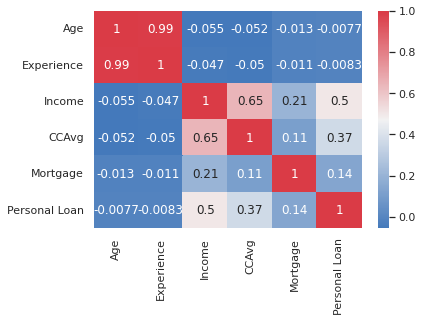

In [ ]:
cmap = sns.diverging_palette(250, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap = cmap, annot = True);

In [ ]:
df.corr()['Personal Loan'][1:-1]

Experience   -0.008338
Income        0.502462
CCAvg         0.366889
Mortgage      0.142095
Name: Personal Loan, dtype: float64

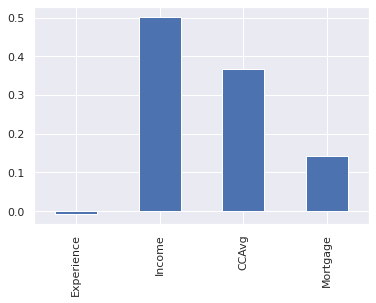

In [ ]:
df.corr()['Personal Loan'][1:-1].plot.bar()

Our response variable is highly correlated with Income and CCAvg

## Model

In [1]:
X = df[['CCAvg', 'Income']]
y = df['Personal Loan']
y = np.array(y)

NameError: ignored

In [2]:
# count values in response array
unique, counts = np.unique(y, return_counts = True)
print(np.asarray((unique, counts)).T)

NameError: ignored

In [ ]:
# 90% cases don't have a personal loan
sum(y == 0)/len(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

In [ ]:
prc_model = Perceptron(random_state=42)
prc_model.fit(X_train, y_train)
y_pred = prc_model.predict(X_test)
accuracy_score(y_test, y_pred)

Our model has a 91,2% accuracy

In [ ]:
# confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

In [ ]:
# plot confusion matrix
import seaborn as sn
sn.heatmap(confusion_matrix, annot=True, fmt = 'g')
plt.show()

From the confusion matrix it seems our model gives too many false negatives, meaning it predicts a person not to have a loan when he does have

In [ ]:
np.unique(y, return_counts = True)

In [ ]:
np.unique(y_pred, return_counts = True)

In [ ]:
fig, ax = plt.subplots()
X_data = X.to_numpy()

y_all = prc_model.predict(X_data)
ax.scatter(x=X_data[:,0], y=X_data[:,1], c=y_all, cmap = 'Paired', alpha=.25)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(x=X_data[:,0], y=X_data[:,1], c=y, cmap = 'Paired', alpha=.25)